In [1]:
from manim import *
import jupyter_capture_output
import pandas as pd

video_scene = " -v WARNING  --disable_caching convolution_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s convolution_Scene"

Jupyter Capture Output v0.0.11


In [ ]:
sleep_data = pd.read_csv("../external_media/SleepMonth.csv", nrows = 35)
sleep_duration = sleep_data["Duration"]


# returns the sleep duration in hours for a given Garmin duration string
def duration_parser(duration):
    hours_string, mins_string = duration.split(" ")
    h_duration = int(hours_string[:-1]) + float(mins_string[:-3])/60
    return h_duration

In [92]:
sleep0 = sleep_duration[0]
duration_parser(sleep0)
sleep_duration[::-1]
type(sleep_duration)

pandas.core.series.Series

Manim Community v0.18.1

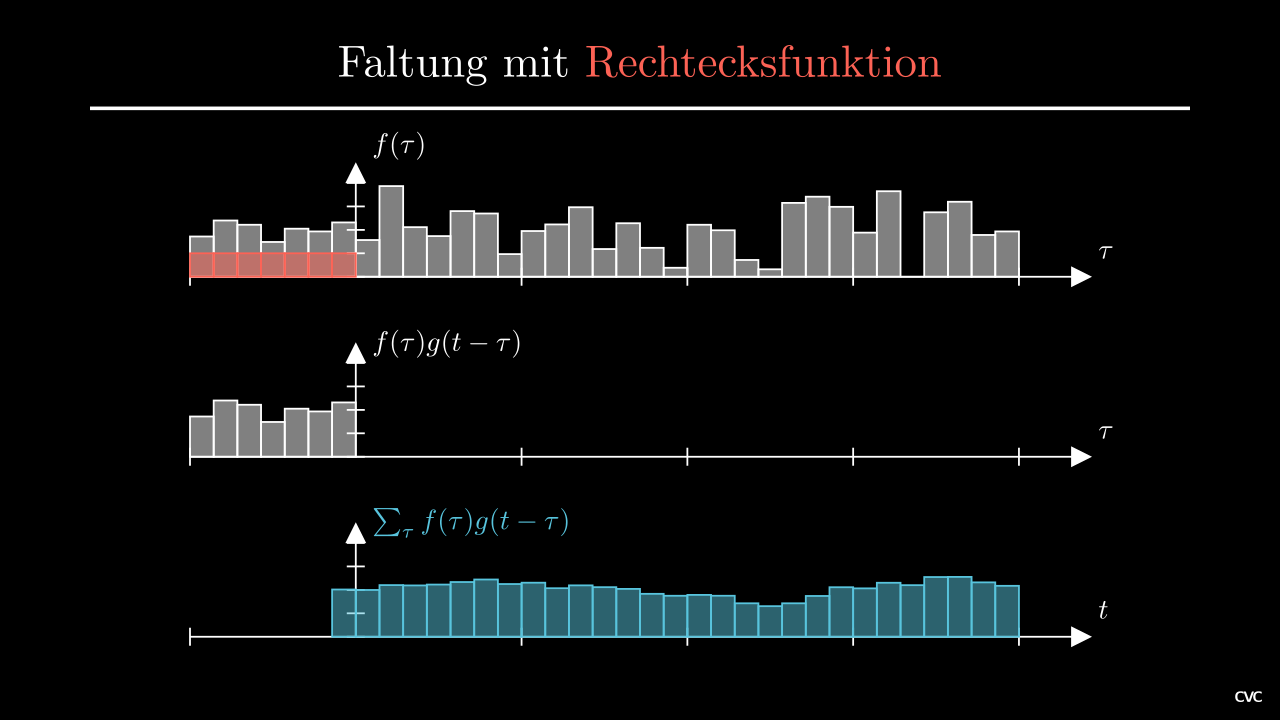

In [160]:
%%manim -qm --fps 60 $video_scene


class convolution_Scene(Scene):
	def construct(self):
		CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
		self.add(CVC)

		# headline
		# headline = Title(r"Faltung: $f(t_i)\star g(t_i)=\sum_j f(\tau_j)g(t_i-\tau_j)$", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)
		headline = Title(r"Faltung mit Rechtecksfunktion", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)
		# headline[0][21:26].set_color(BLUE)
		headline[0][10:27].set_color(RED)
		self.add(headline)


		# coordinate system
		x_length = 10
		y_length = 1.25
		x_range = [-7, 4*7+3, 7]
		y_range = [5, 9.8, 1]

		# x_dict = dict(zip([0, L/2, L], [r"0", r"L/2", r"L"]))
		# y_dict = dict(zip([0, A], [r"0", r"A"]))

		ax = Axes(x_length = x_length, y_length = y_length, x_range = x_range, y_range = y_range, tips = True, axis_config = {"include_ticks": True, "tip_width": 0.2, "tip_height": 0.2}).move_to([0, 1.5, 0])
		ax_xlabel = ax.get_x_axis_label(Tex(r"$\tau$", font_size = 30, color = WHITE))
		ax_ylabel = ax.get_y_axis_label(Tex(r"$f(\tau)$", font_size = 30, color = WHITE))
		self.add(ax, ax_xlabel, ax_ylabel)

		ax_prod = Axes(x_length = x_length, y_length = y_length, x_range = x_range, y_range = y_range, tips = True, axis_config = {"include_ticks": True, "tip_width": 0.2, "tip_height": 0.2}).move_to([0, -0.5, 0])
		ax_prod_xlabel = ax_prod.get_x_axis_label(Tex(r"$\tau$", font_size = 30, color = WHITE))
		ax_prod_ylabel = ax_prod.get_y_axis_label(Tex(r"$f(\tau)g(t-\tau)$", font_size = 30, color = WHITE)).shift(0.2*DOWN)
		# ax_prod_ylabel[0][5:15].set_color(RED)
		self.add(ax_prod, ax_prod_xlabel, ax_prod_ylabel)

		ax_conv = Axes(x_length = x_length, y_length = y_length, x_range = x_range, y_range = y_range, tips = True, axis_config = {"include_ticks": True, "tip_width": 0.2, "tip_height": 0.2}).move_to([0, -2.5, 0])
		ax_conv_xlabel = ax_conv.get_x_axis_label(Tex(r"$t$", font_size = 30, color = WHITE))
		ax_conv_ylabel = ax_conv.get_y_axis_label(Tex(r"$\sum_{\tau} f(\tau)g(t-\tau)$", font_size = 30, color = BLUE)).shift(0.2*DOWN)
		self.add(ax_conv, ax_conv_xlabel, ax_conv_ylabel)


		def get_rect(ax, t, f, color, swidth = 2, fopacity = 0.5):
			bl = ax.c2p(t, 5)
			tl = ax.c2p(t, f)
			tr = ax.c2p(t+1, f)
			br = ax.c2p(t+1, 5)
			return Polygon(bl, tl, tr, br, stroke_color = color, fill_color = color, fill_opacity = fopacity, stroke_width = swidth)



		# returns the sleep duration for given position
		def get_sleep_duration(i):
			return duration_parser(sleep_duration[len(sleep_duration)-(i+7)-1])


		# plotting the sleep data
		for i in range(len(sleep_duration)):
			h_sleep = get_sleep_duration(i-7)
			rect_sleep = get_rect(ax, i-7, h_sleep, WHITE)
			self.add(rect_sleep)


		# returning the rectangular function as well as the convolution with data
		def get_rect_func(i):
			# rectangular function
			rect_group = VGroup()
			for j in range(i-6, i+1):
				if j == i:
					rect_i = get_rect(ax, j, 6, RED, swidth = 2, fopacity = 0.5)
					rect_group.add(rect_i)
				else:
					rect_i = get_rect(ax, j, 6, RED, swidth = 2, fopacity = 0.5)
					rect_group.add(rect_i)
			return rect_group


		# returns the product of function and rect function (which is 1)
		def get_prod_func(i):
			# rectangular function
			rect_group = VGroup()
			for j in range(i-6, i+1):
				h_sleep = get_sleep_duration(j)
				rect_sleep = get_rect(ax_prod, j, h_sleep, WHITE)
				rect_group.add(rect_sleep)
			return rect_group

		
		# returns the convolution
		def get_conv_func(i):
			conv = 0
			for j in range(i-6, i+1):
				conv += get_sleep_duration(j) / 7
				rect_conv = get_rect(ax_conv, i, conv, BLUE, swidth = 2, fopacity = 0.5)
			return rect_conv


		rect_func = get_rect_func(-1)
		prod_func = get_prod_func(-1)
		conv_func = get_conv_func(-1)
		self.add(rect_func, prod_func, conv_func)

		for i in range(28):
			conv_func = get_conv_func(i)
			self.add(conv_func)


